In [1]:
from irec.recommendation.agents.value_functions.most_popular import MostPopular
from scipy.stats.stats import pearsonr
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load Dataset

In [2]:
df_ratings = pd.read_csv("../dataset/MovieLens 100k/ratings.csv")
df_ratings

,user_id,item_id,rating,timestamp
0,0,0,3,881250949
1,1,1,3,891717742
2,2,2,1,878887116
3,3,3,2,880606923
4,4,4,1,886397596
...,...,...,...,...
99995,875,173,3,880175444
99996,708,247,5,879795543
99997,37,1004,1,874795795
99998,58,443,2,882399156


### Construction of the ratings matrix

In [3]:
num_users = df_ratings["user_id"].nunique()
num_items = df_ratings["item_id"].nunique()
num_users, num_items

(943, 1682)

In [4]:
ratings_matrix = csr_matrix(
    (df_ratings["rating"], (df_ratings["user_id"], df_ratings["item_id"])), 
    shape=(num_users, num_items),
    dtype=float
)
ratings_matrix.shape

(943, 1682)

### Get items popularity

In [5]:
items_popularity = MostPopular.get_items_popularity(ratings_matrix)
items_popularity

array([0.12407211, 0.31495228, 0.01378579, ..., 0.00106045, 0.00106045,
       0.00106045])

### Get items features

In [6]:
u, s, vt = svds(ratings_matrix, k=10)
items_features = np.sum((vt.T)**2,axis=1)
items_features

array([1.13637254e-02, 6.19874570e-02, 3.77106593e-04, ...,
       1.85010364e-05, 1.85010364e-05, 1.85010364e-05])

### Plot correlation between the items features vector and the most popular items

Text(0, 0.5, 'Popularity (%)')

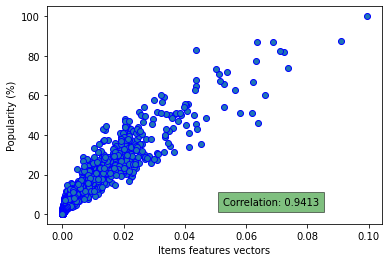

In [7]:
fig, ax = plt.subplots()
corr = pearsonr(items_popularity, items_features)[0]
color = "red" if corr < 0.5 else "green"
alpha = 0.5 if corr >= 0.7 else 0.3
ax.text(0.67, 0.1, 'Correlation: %.4f' % corr,
        bbox={'facecolor': color, 'alpha': alpha, 'pad': 5},
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

max_pop = max(items_popularity)
items_popularity = [(pop/max_pop)*100 for pop in items_popularity]
ax.scatter(items_features, items_popularity, edgecolors='b')

ax.set_xlabel("Items features vectors", fontsize='medium')
ax.set_ylabel("Popularity (%)", fontsize='medium')